# 인공지능과 가위바위보하기
# Step1. 데이터 Resize 하기

가위, 바위, 보 이미지를 28x28로 만들어 주겠습니다. 이를 위해서 PIL 라이브러리를 불러오고, 사이즈를 변환해주는 함수를 만들어주겠습니다.

In [ ]:
from PIL import Image
import glob
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [ ]:
# 가위 이미지
image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /scissor_ksy-samples"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지
image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /rock_ksy-samples"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지
image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /paper_ksy-samples"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


# Step2. 데이터 불러오기 & 전처리

불러온 데이터들의 이미지들이 가위, 바위, 보인것을 알려주기위해 가위는 0, 바위는 1, 보는 2로 라벨링은 해줍니다. 그리고 정규화와 reshape으로 형상도 바꿔줍니다. 

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=900):
    
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3

    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_ksy-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_ksy-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_ksy-samples/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 "
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


In [ ]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)
# 훈련데이터를 섞어줍니다
idx = np.arange(x_train_reshaped.shape[0])
np.random.shuffle(idx)

x_train_reshaped = x_train_reshaped[idx]
y_train = y_train[idx]

잘 불러와졌는지 첫번째이미지를 한번 뽑아봅시다.

라벨:  2


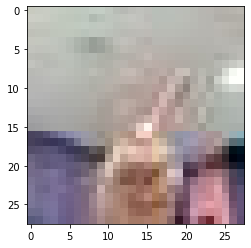

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# Step3. 네트워크 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model_RSP=keras.models.Sequential()
model_RSP.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model_RSP.add(keras.layers.MaxPool2D(2,2))
model_RSP.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model_RSP.add(keras.layers.MaxPooling2D(2,2))
model_RSP.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model_RSP.add(keras.layers.MaxPooling2D(2,2))
model_RSP.add(keras.layers.Flatten())
model_RSP.add(keras.layers.Dense(32, activation='relu'))
model_RSP.add(keras.layers.Dense(3, activation='softmax'))

print('model_RSP에 추가된 Layer 개수: ', len(model_RSP.layers))

model_RSP.summary()

model_RSP에 추가된 Layer 개수:  9
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_43 (MaxPoo

# Step4. 모델 학습시키기

In [ ]:
model_RSP.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model_RSP.fit(x_train_reshaped, y_train, epochs=10)


Epoch 1/10
29/29 [==============================] - 1s 19ms/step - loss: 1.0831 - accuracy: 0.3733
Epoch 2/10
29/29 [==============================] - 1s 20ms/step - loss: 1.0225 - accuracy: 0.5622
Epoch 3/10
29/29 [==============================] - 1s 18ms/step - loss: 0.8545 - accuracy: 0.6767
Epoch 4/10
29/29 [==============================] - 1s 19ms/step - loss: 0.5699 - accuracy: 0.8256
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.3541 - accuracy: 0.8633
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 0.2586 - accuracy: 0.9100
Epoch 7/10
29/29 [==============================] - 1s 20ms/step - loss: 0.2280 - accuracy: 0.9222
Epoch 8/10
29/29 [==============================] - 1s 18ms/step - loss: 0.2361 - accuracy: 0.9056
Epoch 9/10
29/29 [==============================] - 1s 20ms/step - loss: 0.1826 - accuracy: 0.9322
Epoch 10/10
29/29 [==============================] - 1s 19ms/step - loss: 0.1436 - accuracy: 0.9533


# Step5. 테스트세트 불러오기 & 전처리

평가를위해 테스트 데이터를 불러오고, 훈련데이터때 해줬던 resize와 전처리를 해줍니다.

In [ ]:
image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /test/scissor"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /test/paper"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /test/rock"
resize_images(image_dir_path)

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
import numpy as np

def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/익스플러레이션 데이터 - 아이펠 /test"
(x_test, y_test)=load_data_test(image_dir_path)
x_test_norm = x_test/255.0 

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트데이터(x_test)의 이미지 개수는 300 입니다.


In [ ]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
#테스트 데이터를 섞어줍니다.
idx = np.arange(x_test_reshaped.shape[0])
np.random.shuffle(idx)

x_test_reshaped = x_test_reshaped[idx]
y_test = y_test[idx]

# Step6. 모델 평가하기

In [ ]:
test_loss, test_accuracy = model_RSP.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.1159 - accuracy: 0.4300 - 195ms/epoch - 20ms/step
test_loss: 1.115886926651001 
test_accuracy: 0.4300000071525574


# 회고
이번 프로젝트는 CV영역에 대한것이었는데, 처음으로 CNN을 사용해봤다. 밑바닥부터시작하는딥러닝에서 이론적으로만 배우던 합성곱계층이나 풀링계층등을 실제로 써보니까 좀 더 개념적으로 와닿는것 같다. 여러층을 추가해보기도하고 빼보기도하고 값을 바꿔보기도하면서 결과가 어떻게 봐뀌는지 확인을 해볼수있었다. 많다고 좋거나 적다고 안좋은것은 아니었다. 그리고 모델 평가부분에서 어려움을 많이 느꼈던것같다. 최종적으로 43%의 정확도를 보였는데 맨처음은 33%였다. 층을 바꿔가면서 계속 결과를 확인해보았지만 43%가 최대였다. 제일 낮을때는 20%도 나온적도있었다. 낮은 정확도의 원인에는 첫번째로 데이터의 양인것같다. 사실 원래 노드에서 정해진건 훈련데이터가 300개였지만 너무 작다고생각해 900개로 늘려서 훈련을 진행했고, 두번째는 훈련데이터자체를 직접 찍은것이기때문에 좋은 데이터는 아니라고 생각한다. 왜냐하면 다양한 각도, 다양한 배경등으로 찍었어야 좀더 나은 예측을 할 수 있었을텐데 아무래도 직접찍다보니까 한계가있었던것같다. 정확도를 올리기위한 방법으로 드롭아웃도 써볼까했지만 안그래도 적은 데이터이기때문에 악영향을 끼친다고 판단해 사용하지 않았다. 